<a href="https://colab.research.google.com/github/darshikapanwar009/Machine-Learning/blob/main/ORGATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

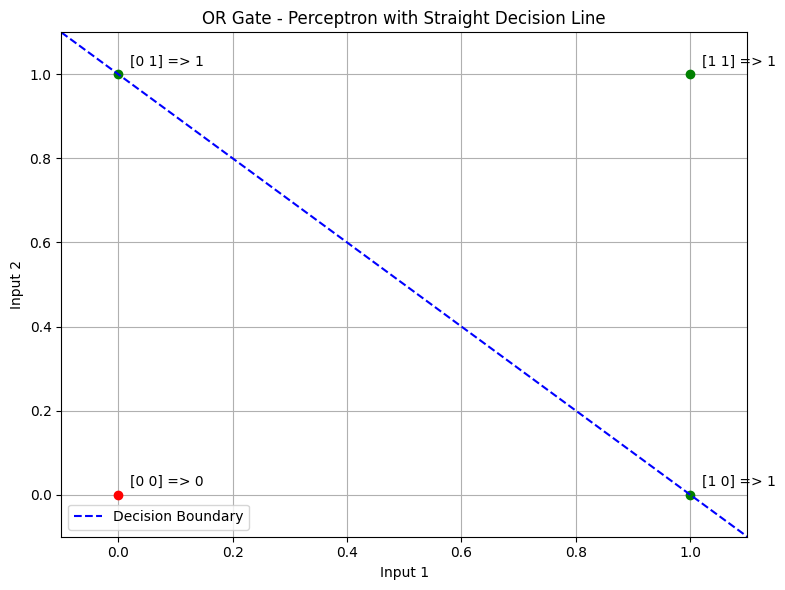

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Step activation function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Perceptron class
class PerceptronOR:
    def __init__(self, input_size, lr=0.1, epochs=20):
        self.lr = lr
        self.epochs = epochs
        self.weights = np.zeros(input_size + 1)  # includes bias

    def predict(self, x):
        z = np.dot(x, self.weights[1:]) + self.weights[0]
        return step_function(z)

    def fit(self, X, y):
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                pred = self.predict(xi)
                update = self.lr * (target - pred)
                self.weights[1:] += update * xi
                self.weights[0] += update

    def plot_decision_boundary(self, X, y):
        x1 = np.linspace(-0.1, 1.1, 10)
        x2 = -(self.weights[0] + self.weights[1]*x1) / self.weights[2]

        plt.figure(figsize=(8, 6))
        for i in range(len(y)):
            color = 'go' if y[i] == 1 else 'ro'
            plt.plot(X[i][0], X[i][1], color)
            plt.text(X[i][0] + 0.02, X[i][1] + 0.02, f"{X[i]} => {y[i]}", fontsize=10)

        plt.plot(x1, x2, label="Decision Boundary", color='blue', linestyle='--')
        plt.title("OR Gate - Perceptron with Straight Decision Line")
        plt.xlabel("Input 1")
        plt.ylabel("Input 2")
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Data for OR gate
X_or = np.array([[0,0], [0,1], [1,0], [1,1]])
y_or = np.array([0, 1, 1, 1])

# Train and visualize
model_or = PerceptronOR(input_size=2)
model_or.fit(X_or, y_or)
model_or.plot_decision_boundary(X_or, y_or)
